In [1]:
import sys
sys.path.insert(0, '../')
from lib.io_functions import load_npy,load_average_npy,load_analysis_npy

import matplotlib.pyplot as plt
import numpy as np
# %matplotlib qt

run = 26
dec_run = 10
ch = [0,1,4,6]

my_runs  = load_npy          ([run]    ,ch)
dec_runs = load_average_npy  ([dec_run],ch)
var_runs = load_analysis_npy ([run],ch)

### Check av wvf makes sense


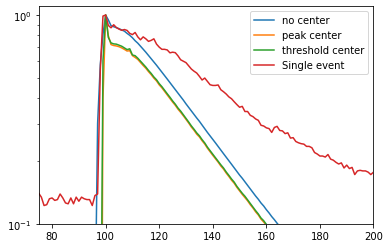

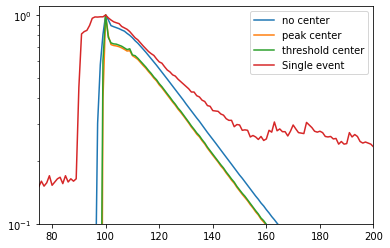

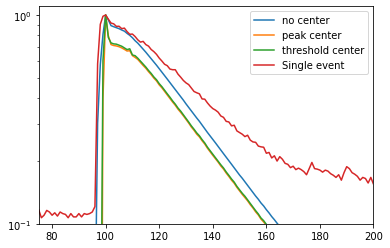

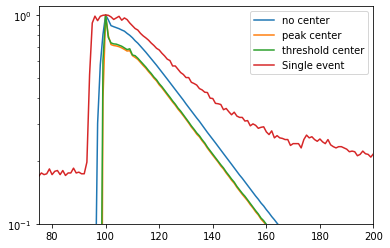

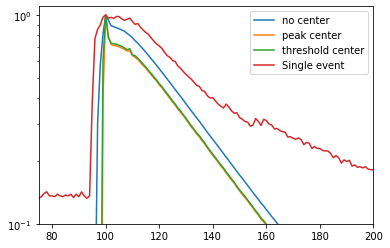

In [4]:
for ev in range(5):
    plt.figure()
    wvf=[
         dec_runs[10][0]["AvWvf"]                                  ,
         dec_runs[10][0]["AvWvf_peak"]                             ,
         dec_runs[10][0]["AvWvf_threshold"]                        ,
        -my_runs [run][0]["ADC"][ev]+var_runs [26][1]["Ped_mean"][ev]
        ]

    plt.plot(wvf[0][np.argmax(wvf[0])-100:]/np.max(wvf[0]))
    plt.plot(wvf[1][np.argmax(wvf[1])-100:]/np.max(wvf[1]))
    plt.plot(wvf[2][np.argmax(wvf[2])-100:]/np.max(wvf[2]))
    plt.plot(wvf[3][np.argmax(wvf[3])-100:]/np.max(wvf[3]))

    plt.semilogy()
    plt.xlim    ([75,200])
    plt.ylim    ([0.1,1.1])
    plt.legend  (["no center","peak center","threshold center","Single event"])

## Wiener computation

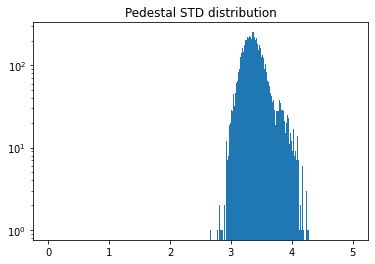

In [5]:
plt.figure()
a=plt.hist(var_runs[run][0]["Ped_STD"],500,[0,5]);
plt.semilogy()
STD_av=a[1][np.argmax(a[0])]
plt.title("Pedestal STD distribution")

noise=np.random.normal(0,STD_av,my_runs[run][0]["NBins_wvf"])

[]

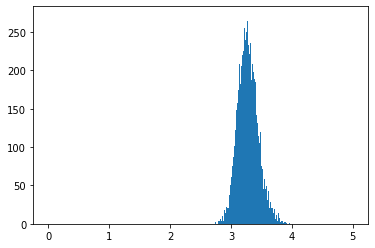

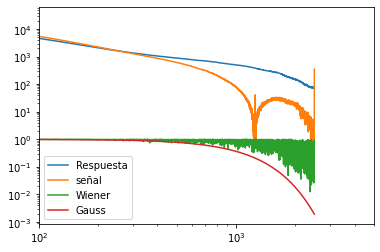

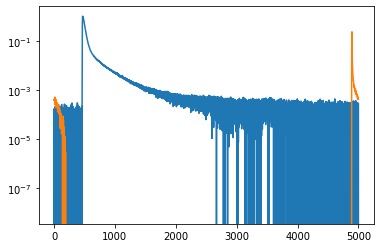

In [45]:
import scipy.fft

%matplotlib inline

chan=1
a=plt.hist(var_runs[run][chan]["Ped_STD"],500,[0,5]);
STD_av=a[1][np.argmax(a[0])]

plt.figure()
signal=wvf[0]
signal  =load_average_npy([run]    ,ch)[run][chan]["AvWvf"]
response=dec_runs                      [10 ][chan]["AvWvf_peak"]

FT_response=scipy.fft.rfft(response)
FT_signal  =scipy.fft.rfft(signal)
FT_noise   =scipy.fft.rfft(noise)

Wiener     =np.abs(FT_response  )**2/(np.abs(FT_noise  )**2+np.abs(FT_response  )**2)
Wiener[0]=0
Gauss      =np.exp(-0.000001*(np.arange(len(Wiener))**2))
Gauss[0]=0;

plt.plot(np.abs(FT_response) )
plt.plot(np.abs(FT_signal  ) )
plt.plot( Wiener )
plt.plot( Gauss )
plt.legend(["Respuesta","señal","Wiener","Gauss"])


plt.semilogy()
plt.semilogx()
plt.xlim([1e2,0.5e4])

plt.figure()

plt.plot(signal/max(signal))
# plt.plot( np.fft.irfft(FT_response/FT_signal*Wiener) )
plt.plot( scipy.fft.irfft(FT_signal/FT_response*Gauss) )


plt.semilogy()

array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04])